In [19]:
# Dependencies
from census import Census
# from config import  api_key
from config import nomics_key
from config import market_api
import gmaps
import numpy as np
import pandas as pd
import requests
import json
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import urllib.request


In [20]:
url = f"https://api.nomics.com/v1/currencies/ticker?key={nomics_key}&interval=30d,365d&convert=&per-page=100&page=1"

response = requests.get(url).json()

print(json.dumps(response, indent=4, sort_keys=True))

[
    {
        "30d": {
            "market_cap_change": "-79966826283.23",
            "market_cap_change_pct": "-0.0681",
            "price_change": "-4329.72071617",
            "price_change_pct": "-0.0695",
            "volume": "1377910714963.89",
            "volume_change": "-173868207265.12",
            "volume_change_pct": "-0.1120"
        },
        "365d": {
            "market_cap_change": "751976845786.65",
            "market_cap_change_pct": "2.2014",
            "price_change": "39510.63638913",
            "price_change_pct": "2.1455",
            "volume": "22212273919117.85",
            "volume_change": "11349163572925.27",
            "volume_change_pct": "1.0447"
        },
        "circulating_supply": "18878631",
        "currency": "BTC",
        "first_candle": "2011-08-18T00:00:00Z",
        "first_order_book": "2017-01-06T00:00:00Z",
        "first_trade": "2011-08-18T00:00:00Z",
        "high": "67602.93030844",
        "high_timestamp": "2021-11-08T00

In [21]:
# Empty data to save retrieved data
name = []
price = []
rank = []
cap = []
high = []
ticker = []
year_price_change = []
year_pct_price_change = []
year_mktcap_change = []
year_pct_mktcap_change = []
set_index = 0
# For loop to retrieve data
for currency in response:
# Use try because not all data is complete
    try:
#       Retrieve each variable and save it in to the empty list
        name.append(response[set_index]["name"])
        ticker.append(response[set_index]['currency'])
        rank.append(response[set_index]['rank'])
        price.append(response[set_index]['price'])
        cap.append(response[set_index]['market_cap'])
        high.append(response[set_index]['high'])
    
        ypchange = response[set_index]['365d']['price_change']
        year_price_change.append(ypchange)
    
        yppchange = response[set_index]['365d']['price_change_pct']
        year_pct_price_change.append(yppchange)
    
        mpchange = response[set_index]['365d']["price_change"]
        year_mktcap_change.append(mpchange)
    
        mppchange = response[set_index]['365d']["price_change_pct"]
        year_pct_mktcap_change.append(mppchange)
        
# Add 1 to the index so it goes to the next currency
        set_index += 1
    
# Except to solve inexistent information, this information is a null
    except(KeyError):
        year_mktcap_change.append("")
        year_pct_mktcap_change.append("")
        set_index += 1
    
# Create new Data Frame with retrieved data
currency_df = pd.DataFrame({
    "Name": name,
    "Ticker": ticker,
    "Rank": rank,
    "Price": price,
    "Market Cap": cap,
    "High": high,
    "Year Price Change": year_price_change,
    "Year % Price Change": year_pct_price_change,
    "Year Market Cap Change": year_mktcap_change,
    "Year % Market Cap Change": year_pct_mktcap_change,})         


currency_df.style.format({"Price": "${:.2f}", 
                          "Market Cap": "${:.2f}", 
                          "High": "${:.2f}",
                          "Year Price Change":"${:}"})

currency_df.set_index('Name', inplace=True)
currency_df.head(10)

,Ticker,Rank,Price,Market Cap,High,Year Price Change,Year % Price Change,Year Market Cap Change,Year % Market Cap Change
Name,,,,,,,,,
Bitcoin,BTC,1,57926.53873828,1093573749947,67602.93030844,39510.63638913,2.1455,39510.63638913,2.1455
Ethereum,ETH,2,4250.00332631,503282534973,4811.20029542,3690.26240279,6.5928,3690.26240279,6.5928
Binance Coin,BNB,3,581.87812747,97835263608,677.12634098,551.85281213,18.3796,551.85281213,18.3796
Tether,USDT,4,1.00163647,74058941793,1.09097429,-0.000064548738,-0.0001,-0.000064548738,-0.0001
Solana,SOL,5,209.75349262,63690079501,259.03790999,207.59970778,96.3883,207.59970778,96.3883
Cardano,ADA,6,1.89157139,60655867126,2.96776063,1.74570315,11.9677,1.74570315,11.9677
XRP,XRP,7,1.07443647,50669322705,2.75789680,0.62819110,1.4077,0.62819110,1.4077
Polkadot,DOT,8,40.40375162,42731284353,368.57140373,34.89330256,6.3322,34.89330256,6.3322
USD Coin,USDC,9,1.00132171,34503634373,1.02995040,0.0027110005,0.0027,0.0027110005,0.0027


In [4]:
currency_df['Price'] = currency_df['Price'].astype('float64')
currency_df['Rank'] = currency_df['Rank'].astype('int')
currency_df['Market Cap'] = currency_df['Market Cap'].astype('float64')
currency_df['High'] = currency_df['High'].astype('float64')
currency_df['Year Price Change'] = currency_df['Year Price Change'].astype('float64')
currency_df['Year % Price Change'] = currency_df['Year % Price Change'].astype('float64')
currency_df['Year Market Cap Change'] = currency_df['Year Market Cap Change'].astype('float64')
currency_df['Year % Market Cap Change'] = currency_df['Year % Market Cap Change'].astype('float64')

currency_df.to_csv("all_crypto_currency.csv", index=False, header=True)
currency_df.dtypes

Ticker                       object
Rank                          int64
Price                       float64
Market Cap                  float64
High                        float64
Year Price Change           float64
Year % Price Change         float64
Year Market Cap Change      float64
Year % Market Cap Change    float64
dtype: object

In [5]:

top_price = currency_df['Price'].nlargest(n=5)
top_mCap = currency_df['Market Cap'].nlargest(n=5)
top_p_change = currency_df['Year Price Change'].nlargest(n=5)
top_pp_change = currency_df['Year % Price Change'].nlargest(n=5)
top_mc_change = currency_df['Year Market Cap Change'].nlargest(n=5)
top_mcp_change = currency_df['Year % Market Cap Change'].nlargest(n=5)

Text(0.5, 0, 'Currency')

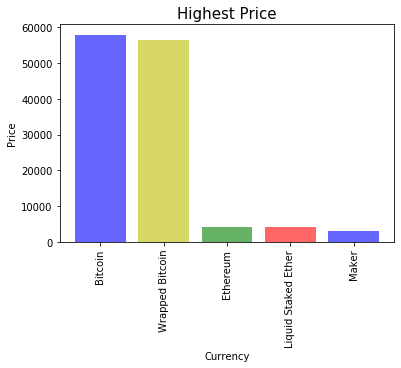

In [6]:
# Set variables to be charted
x_axis = top_price.index.values
y_axis = top_price.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.6, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Highest Price", fontsize=15)
plt.ylabel("Price")
plt.xlabel("Currency")

Text(0.5, 0, 'Currency')

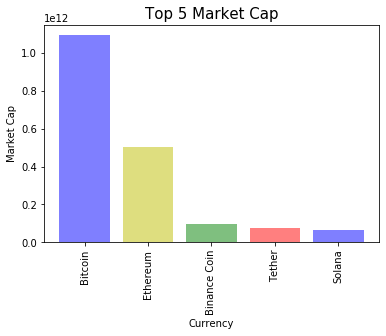

In [7]:
x = top_mCap
# Set variables to be charted
x_axis = x.index.values
y_axis = x.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Top 5 Market Cap", fontsize=15)
plt.ylabel("Market Cap")
plt.xlabel("Currency")

Text(0.5, 0, 'Currency')

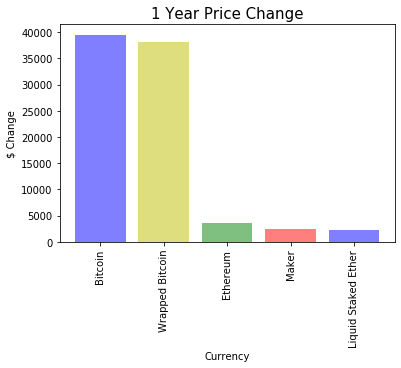

In [8]:
x = top_p_change
# Set variables to be charted
x_axis = x.index.values
y_axis = x.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("1 Year Price Change", fontsize=15)
plt.ylabel("$ Change")
plt.xlabel("Currency")

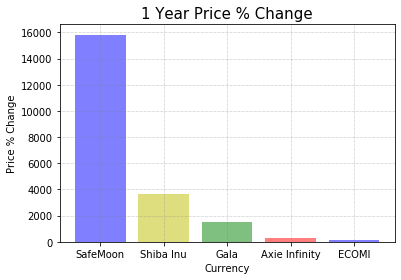

In [9]:
x = top_pp_change
# Set variables to be charted
x_axis = x.index.values
y_axis = x.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.5,)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("1 Year Price % Change", fontsize=15)
plt.ylabel("Price % Change")
plt.xlabel("Currency")
plt.xticks(rotation=0)
plt.style.use('seaborn-pastel')
plt.grid(linestyle=':', linewidth='0.5', color='grey')
plt.savefig('1 Year Price % Change.png')

Text(0.5, 0, 'Currencies')

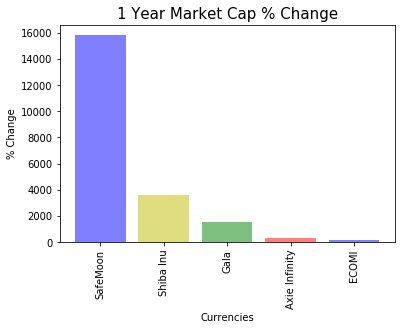

In [10]:
x = top_mcp_change
# Set variables to be charted
x_axis = x.index.values
y_axis = x.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("1 Year Market Cap % Change", fontsize=15)
plt.ylabel("% Change")
plt.xlabel("Currencies")

Text(0.5, 0, 'Price')

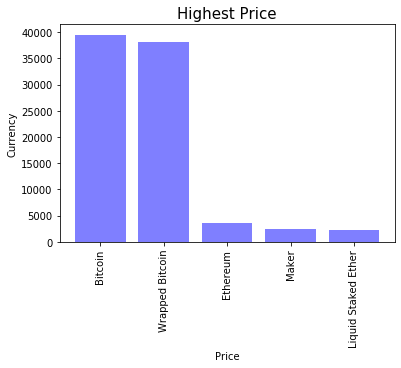

In [11]:
x = top_mc_change
# Set variables to be charted
x_axis = x.index.values
y_axis = x.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Highest Price", fontsize=15)
plt.ylabel("Currency")
plt.xlabel("Price")

In [12]:
sm_price = currency_df['Price'].nsmallest(n=5)
sm_mCap = currency_df['Market Cap'].nsmallest(n=5)
sm_p_change = currency_df['Year Price Change'].nsmallest(n=5)
sm_pp_change = currency_df['Year % Price Change'].nsmallest(n=5)
sm_mc_change = currency_df['Year Market Cap Change'].nsmallest(n=5)
sm_mcp_change = currency_df['Year % Market Cap Change'].nsmallest(n=5)

Text(0.5, 0, 'Currency')

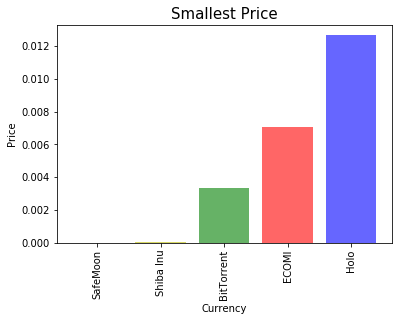

In [13]:
# Set variables to be charted
x_axis = sm_price.index.values
y_axis = sm_price.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.6, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Smallest Price", fontsize=15)
plt.ylabel("Price")
plt.xlabel("Currency")

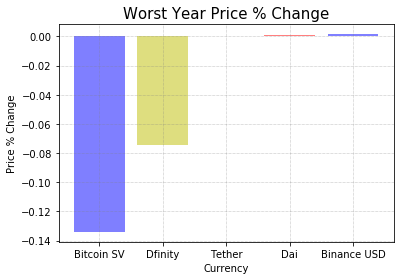

In [15]:
x = sm_pp_change
# Set variables to be charted
x_axis = x.index.values
y_axis = x.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.5,)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Worst Year Price % Change", fontsize=15)
plt.ylabel("Price % Change")
plt.xlabel("Currency")
plt.xticks(rotation=0)
plt.style.use('seaborn-pastel')
plt.grid(linestyle=':', linewidth='0.5', color='grey')
plt.savefig('Worst Year Price % Change.png')

In [ ]:
currency_list = []
answer = "yes"
while answer == "yes":
    q_divider = input("Do you have a particular currency you are interested in? (yes/no)")
    if q_divider == "yes":
        more = "yes"
        while more == "yes":
            currency = input("please insert the name of a currency your are interested in: ")
            currency_list.append(currency)
            more = input("Are you interested in any other currency? ")
        answer = "no"

    elif q_divider == "no":
        print("This are the all the possibilities: ")
        index = 0
        for x in response:
            print(response[index]['name'])
            index += 1
        answer = input("Are you interested in any of this (yes/no)")
        more = "yes"
        while more == "yes":
            currency = input("please insert the name of a currency your are interested in: ")
            currency_list.append(currency)
            more = input("Are you interested in any other currency? ")
        answer = "no"
    else:
        print("I'm sorry, that is not a valid answer ... ")
        print("Ok, let's start again")
print(f"Ok, the currencies you are interested in are {currency_list}")

In [ ]:
choice_df = pd.DataFrame({})
for currency in currency_list:
    actual = currency_df.loc[currency_df.index == currency]
    choice_df = choice_df.append(actual)
choice_df

In [ ]:
# Generate a bar plot with the user's input 
x_axis = choice_df.index
y_axis = choice_df["Year % Price Change"].values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''r''g''y', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Year % Price Change", fontsize=15)
plt.ylabel("% Change")
plt.xlabel("Currencies")

column = choice_df['Year % Price Change']
max_index = column.idxmax()
print(f"Of these choices this years best investment would have been: {max_index}")

In [ ]:
# Calculate result of investment
amount = float(input("How much would you have invested? "))
max_change = choice_df['Year % Price Change'].max()
revenue = amount * max_change
print(f"You would have made ${revenue}")